# Decision Tree Classifier

**Import all libraries**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

**Loading of datasets**

In [3]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
59,5.2,2.7,3.9,1.4
117,7.7,3.8,6.7,2.2
81,5.5,2.4,3.7,1.0
65,6.7,3.1,4.4,1.4


In [5]:
df.columns=[["Sepal_length","Sepal_width","Petal_length","Petal_width"]]
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Seperating variables into features and target**

In [7]:
x=df.iloc[:]
y=iris.target
print(x)
print(y)

    Sepal_length Sepal_width Petal_length Petal_width
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Splitting datasets into training and testing sets**

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)


**Decision Tree Algorithm**

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
yhat=dtc.predict(x_test)

**Visualize the Decision Tree Model**

In [11]:
#Import the required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


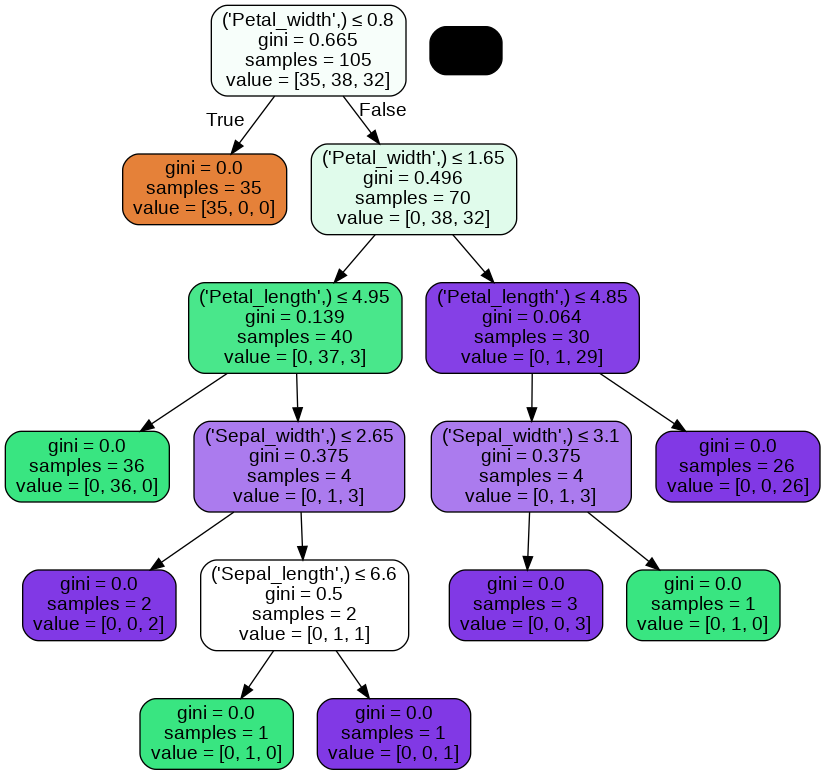

In [15]:
# Import necessary libraries for graph vizualization
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=df.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Classification report and Accuracy of model**

In [22]:
print(f"Classification_report:\n{classification_report(y_test,yhat)}")
print(f"Accuracy of our Decision Tree Classifier model is:{accuracy_score(y_test,yhat)}")

Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of our Decision Tree Classifier model is:0.9777777777777777


**Confusion matrix and heatmap plot**

[[15  0  0]
 [ 0 11  1]
 [ 0  0 18]]


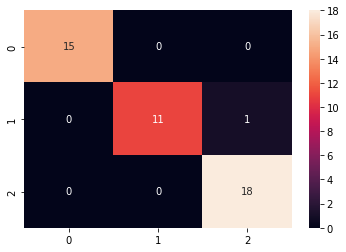

In [35]:
cm=confusion_matrix(y_test,yhat)
print(cm)
sns.heatmap(cm,color="rgb",annot=True)

**Predicting Iris Class for a random case**

In [36]:
df.head(3)

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [40]:
new_input=[['5.0','3.1','1.2','0.3']]
new_output=dtc.predict(new_input)
print(f"new input:{new_input}  new output:{new_output}")

new input:[['5.0', '3.1', '1.2', '0.3']]  new output:[0]


So we can say the class for our new random case is class[0] that is iris-setosa.